This notebook will develop a function to read wideband frequency response output from Echoview and adjust the frequency bins to resample at a given frequency range points.

In [9]:
import csv
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
%matplotlib inline

# Write function to read file

In [154]:
def read_widebandfrequencyresponse(fname,header = 9, extracols = 1, source='Echoview'):
    """"Opens a file created by the wideband frequency response graph 
    export file. Returns a matrix containing the frequency array and 
    the volume backscattering coefficient.
    
    Parameters:
    fname: filename with path of EV export from wideband frequency response plot - graph- export
    header: the number of lines in the header information (the default is 9.)
    extracols: The columns without backscatter information. Typically information on fileset. (The default is 1.)
    source: File export program. LSSS or Echoview (default)
    
    Returns:
    freqs: array of frequencies
    sv: array of volume backscatter coefficient values
    """
    if source=='Echoview':
        wideband_extract = pd.read_csv(fname, header=0, index_col = 0, usecols = np.arange(0,12))
        data = wideband_extract.T
        
        # Extract time
        times = np.array([])
        for ind in range(0,len(data)):
            times = np.append(times, datetime.strptime(str(data['Ping_date'][ind]+ ' ' + data['Ping_time'][ind]), '%Y-%m-%d %H:%M:%S'))
        
        # Extract sv and frequencies
        Sv_resp = data.to_numpy()[:,8:]
        Sv_resp_array = np.array(Sv_resp, dtype=float)

        #Calculate volume backscatter coefficient.
        freqs = np.array(data.columns[8:], dtype=float)
        sv = 10**(Sv_resp_array/10)
        
    if source=='LSSS':
        json_file = open(fname)
        freq_response_lsss = json.load(json_file)
        ping_lsss = freq_response_lsss['regions'][0]['pings']
        
        # Set up frequency array
        min_freq = ping_lsss[0]['channels'][0]['minFrequency']
        max_freq = ping_lsss[0]['channels'][0]['maxFrequency']
        num_freqs = ping_lsss[0]['channels'][0]['numFrequencies']
        freqs = np.linspace(min_freq,max_freq,num_freqs)
        Sv = np.zeros([len(freqs), len(ping_lsss)])
        for ind in range(0,len(ping_lsss)):
            Sv[:,ind]=ping_lsss[ind]['channels'][0]['sv']
        sv = 10**(Sv/10)
        

    
    return freqs, sv, times

# Run function

In [155]:
fname = 'D:/GLIDER2018/Echosounder/Flaket_SSL/Wideband_21061018.csv'
freqs, sv, times = read_widebandfrequencyresponse(fname, extracols = 2)

In [150]:
wideband_extract = pd.read_csv(fname, header=0, index_col = 0, usecols = np.arange(0,12))
data = wideband_extract.T
Sv_resp = data.to_numpy()[:,8:]
Sv_resp_array = np.array(Sv_resp, dtype=float)

#Calculate volume backscatter coefficient.
freqs = np.array(data.columns[8:], dtype=float)
sv = 10**(Sv_resp_array/10)

In [151]:
np.shape(sv)

(11, 820)

In [115]:
times = np.array([])
for ind in range(0,len(data)):
    times = np.append(times, datetime.strptime(str(data['Ping_date'][ind]+ ' ' + data['Ping_time'][ind]), '%Y-%m-%d %H:%M:%S'))
data['times'] = times   

In [125]:
data.to_numpy()[:,8:]

array([['-57.285955', '-57.404620', '-57.575472', ..., '-59.109896',
        '-59.207354', '-59.216226'],
       ['-53.828270', '-54.020799', '-54.250640', ..., '-53.652767',
        '-53.532890', '-53.479416'],
       ['-57.779342', '-57.863895', '-57.923221', ..., '-57.824419',
        '-57.774090', '-57.744819'],
       ...,
       ['-49.997829', '-50.128963', '-50.281056', ..., '-51.127388',
        '-51.154991', '-51.131604'],
       ['-57.917843', '-57.958179', '-58.030288', ..., '-57.478563',
        '-57.347829', '-57.215010'],
       ['-52.391928', '-52.200924', '-52.099345', ..., '-55.077229',
        '-54.858397', '-54.702340']], dtype=object)

In [128]:
freq_response = freq_response_csv.to_numpy()
# Remove fileset column
freq_resp = freq_response[:,:-2]
#Calculate volume backscatter coefficient.
freqs = freq_resp[:,0]
sv = 10**(freq_resp[:,'']/10)

NameError: name 'freq_response_csv' is not defined

In [27]:
freq_response_csv = pd.read_csv(fname,header=0)
freq_response_csv

,Interval_index,0,1,2,3,4,5,6,7,8,9,10,Variable_index,Variable_name
0,Ping_index,0,264,528,792,1056,1320,1584,1848,2112,2376,2640,NaN,NaN
1,Ping_date,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,2018-06-21,NaN,NaN
2,Ping_time,08:01:06,08:10:01,08:34:01,08:42:57,09:06:52,09:15:47,10:39:41,11:03:36,11:12:32,11:36:31,11:45:31,NaN,NaN
3,Ping_milliseconds,055.0,462.0,072.0,259.0,063.0,229.0,966.0,743.0,779.0,991.0,308.0,NaN,NaN
4,Range_start,7.5633012826,6.2554475241,8.0642516274,5.0495781218,4.7481107713,13.6338609290,8.4787692344,7.3105832510,7.9789975561,7.9789975561,8.2800918035,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,382.487,-58.791160,-53.968518,-58.018119,-56.950342,-47.861036,-49.630199,-53.860114,-58.280150,-50.936373,-57.716868,-55.600344,0.0,Fileset 1: Sv pulse compressed wideband pings T1
824,382.609,-58.957642,-53.810112,-57.904067,-57.042555,-47.627890,-49.315372,-53.792461,-58.025012,-51.051033,-57.603421,-55.334810,0.0,Fileset 1: Sv pulse compressed wideband pings T1
825,382.731,-59.109896,-53.652767,-57.824419,-57.136447,-47.407847,-49.025808,-53.716666,-57.809265,-51.127388,-57.478563,-55.077229,0.0,Fileset 1: Sv pulse compressed wideband pings T1
826,382.854,-59.207354,-53.532890,-57.774090,-57.217373,-47.201777,-48.772151,-53.634662,-57.648532,-51.154991,-57.347829,-54.858397,0.0,Fileset 1: Sv pulse compressed wideband pings T1


# Plot

Text(0, 0.5, 'sv ($m_{-1}$)')

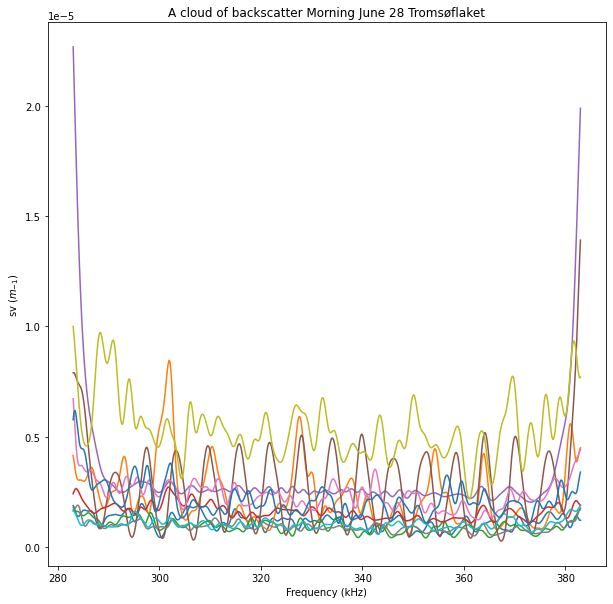

In [156]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs,sv.T)
plt.title('A cloud of backscatter Morning June 28 Tromsøflaket')
plt.xlabel('Frequency (kHz)')
plt.ylabel('sv ($m_{-1}$)')

In [9]:
    fname = 'D:/GLIDER2018/Echosounder/LSSS_Tromsøflaket/Export/BroadbandSv/BroadbandSv_T20180628_07062004-20180628_12060909_01.json'
freqs, sv = read_widebandfrequencyresponse(fname, source='LSSS')

Text(0, 0.5, 'sv ($m_{-1}$)')

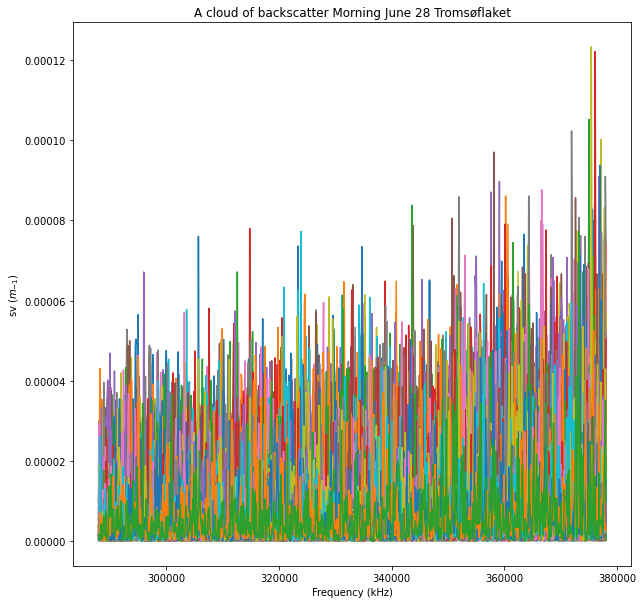

In [10]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs,sv)
plt.title('A cloud of backscatter Morning June 28 Tromsøflaket')
plt.xlabel('Frequency (kHz)')
plt.ylabel('sv ($m_{-1}$)')